# Проект по исследованию рынка видеоигр.

## Описание проекта.
Мы будем проводит исследование данных о продажах игр, оценки пользователей и экспертов, жанры и платформы, для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры

## Цель проекта.
 Цель проекта - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Описание данных.
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).Данные до 2016 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание столбцов:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## План работы:
* Шаг 1. Откроем файл с данными и изучим общую информацию
  Путь к файлу: /datasets/games.csv. Скачать датасет
* Шаг 2. Подготовим данные:
  1. Заменим названия столбцов (приведем к нижнему регистру);
  2. Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
  3. Обработаем пропуски при необходимости:
  4. Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
  5. Опишем причины, которые могли привести к пропускам;
  6. Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишем, как его   обработать;
  7. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
* Шаг 3. Проведем исследовательский анализ данных
  1. Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
  2. Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос - за какой характерный срок появляются новые и исчезают старые платформы?
  3. Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
  4. Не будем учитывать в работе данные за предыдущие годы.
  5. Ответим на вопрос - какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
  6. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
  7. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
  8. Соотнесем выводы с продажами игр на других платформах.
  9. Посмотрим на общее распределение игр по жанрам. Ответим на вопросы - что можно сказать о самых прибыльных жанрах?; выделяются ли жанры с высокими и низкими продажами?
* Шаг 4. Составим портрет пользователя каждого региона.
  1. Определим для пользователя каждого региона (NA, EU, JP):
    * Самые популярные платформы (топ-5). Опишем различия в долях продаж.
    * Самые популярные жанры (топ-5). Поясним разницу.
    * Влияет ли рейтинг ESRB на продажи в отдельном регионе?
* Шаг 5. Проверим гипотезы
  1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
  3. Поясним:
   * Как сформулировали нулевую и альтернативную гипотезы;
   * Какой критерий применили для проверки гипотез и почему.
* Шаг 6. Общий вывод

### Шаг 1. Загрузка и изучение данных.

#### 1.1  Импортируем необходимые для исследования библиотеки.

In [1]:
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
import seaborn as sns

#### Сохраним датафрейм в переменной и ознакомимся с данными.

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


После первичного знакомства с данными можем сказать:
* всего в датафрейме 1715 строк;
* названия столбцов нужно привести к общему стилю;
* тип данных в Year_of_Release и User_Score не соответствует содержимому.
* в столбцах Name,Year_of_Release,Genre есть незначительные пропуски, в столбцах Critic_Score,User_Score и Rating большое количество пропусков.

### Шаг 2. Подготовим данные.

#### Приведем названия колонок к нижнему регистру и проверим результат:

In [4]:
df.columns = map(str.lower, df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Всего 16715 вхождений. Есть пропуски в столбцах name, year_of_release,genre,critic_score,user_score,rating. Посмотрим доли пропусков в столбцах:

In [5]:
pd.DataFrame(round(df.isna().mean()*100,10))

,0
name,0.011965
platform,0.000000
year_of_release,1.609333
genre,0.011965
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.319174
user_score,40.089740


В столбцах name, year_of_release,genre пропуски удалим так как их меньше 2% и это не повлияет на исследование(почему-то метод dropna() не сработал, удалим через loc):

In [6]:
df = df.loc[df['name'].isna()==False]
df = df.loc[df['year_of_release'].isna()==False]
df = df.loc[df['genre'].isna()==False]

pd.DataFrame(round(df.isna().mean()*100,10))

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.453418
user_score,40.166626


In [7]:
df.loc[df['rating'].isna() & df['other_sales'] > 0.1]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14754,SingStar Fussballhits,PS3,2010.0,Misc,0.00,0.02,0.00,0.01,NaN,NaN,NaN
14782,SingStar Chartbreaker,PS3,2009.0,Misc,0.00,0.02,0.00,0.01,NaN,NaN,NaN
14831,Rugby League Live,PS3,2010.0,Sports,0.00,0.02,0.00,0.01,NaN,NaN,NaN
14871,Resident Evil 5 HD,PS4,2016.0,Action,0.02,0.00,0.00,0.01,NaN,NaN,NaN


Пропуски в столбцах critic_score и user_score можно попробовать заполнить исходя из названия игры, но оставим как есть, так как заполнение заполнение 40-50% пропусков может сильно исказить результаты исследования. 

Вероятных причин пропусков может быть несколько:
 * ошибка выгрузки данных для современных игр.
 * отсутствие измерения рейтинга как такового для старых игр.
 * отсутствие рейтинга на непопулярных платформах и/или играх.

Пропуски в столбце rating заменим на 'unknow' для последующего исследования.

In [8]:
df['rating'] = df['rating'].fillna('unknow')
df['rating']

0             E
1        unknow
2             E
3             E
4        unknow
          ...  
16710    unknow
16711    unknow
16712    unknow
16713    unknow
16714    unknow
Name: rating, Length: 16444, dtype: object

#### Изменим типы данных в столбцах.

Столбец year_of_release преобразуем к целочисленному типу, тк год это целое число всегда.

In [9]:
df['year_of_release'] = df['year_of_release'].astype(int)

При попытке преобразовать user_score к float - возвращается ошибка, что нельзя преобразовать tbd к float. Буквы tbd значат to be determined, это значит что данные были специально не заполнены, заменим tbd на Nan и преобразуем user_score к float:

In [10]:
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)
df['user_score'] = df['user_score'].astype(float)

Проверим внесенные изменения:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Проверим данные на дубликаты.

In [12]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют.

In [13]:
df[[ 'name','platform', 'year_of_release']].value_counts().head(5)

name                        platform  year_of_release
Madden NFL 13               PS3       2012               2
 Beyblade Burst             3DS       2016               1
Ratatouille                 PC        2007               1
Rapala Tournament Fishing!  X360      2006               1
Rapala Trophies             PSP       2006               1
dtype: int64

Обнаружен 1 неявный дубликат, удалим его.

In [14]:
df.loc[(df[ 'name'] == 'Madden NFL 13') & (df[ 'platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Удалим строку с индексом 16230, так как в ней нулевые данные по продажам.

In [15]:
df = df.drop(index=16230)

Проверим результат.

In [16]:
df.loc[(df[ 'name'] == 'Madden NFL 13') & (df[ 'platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E


#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [17]:

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Размер нового столбца не отличается, пропуски отсутствуют.

Вывод. На этапе предобработки мы сделали следующее:
* заменили названия столбцов (привели к нижнему регистру);
* преобразовали данные:
   1. В столбце year_of_release к целочисленному типу, тк год это целое число всегда.
   2. При попытке преобразовать user_score к float - возвращалась ошибка, что нельзя преобразовать tbd к float. Буквы tbd значат to be determined, это значит что данные были специально не заполнены, заменили tbd на Nan и преобразовали user_score к float, тк рейтинг записан дробным числом.
* проверили явные дубликаты - отсутствуют.
* проверили неявные дубликаты - удалили повторяющуюся строку.
* обработали пропуски:
   1. В столбцах name, year_of_release,genre пропуски удалили так как их меньше 2% и это не повлияет на исследование.
   2. Пропуски в столбцах critic_score и user_score можно попробовать заполнить исходя из названия игры, но оставим как есть, так как заполнение заполнение 40-50% пропусков может сильно исказить результаты исследования.
   3. Пропуски в столбце rating заменили на 'unknow' для последующего исследования.
* вероятных причин пропусков может быть несколько:
   1. ошибка выгрузки данных для современных игр.
   2. отсутствие измерения рейтинга как такового для старых игр.
   3. отсутствие рейтинга на непопулярных платформах и/или играх. 
* посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

### Шаг 3. Проведем исследовательский анализ данных.

#### Посмотрим, сколько игр выпускалось в разные годы. Ответим на вопрос - важны ли данные за все периоды?

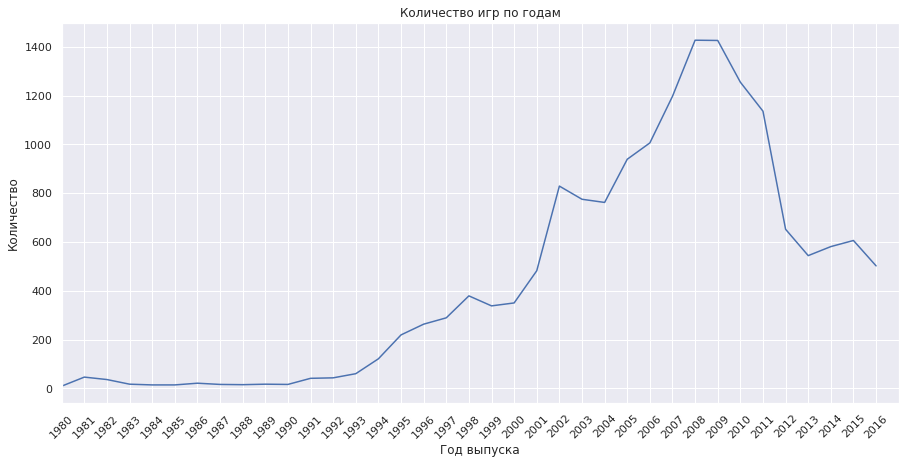

In [62]:
total_sales_year = df.groupby('year_of_release')['name'].count()

plt.figure(figsize=(15,7))
plt.title('Количество игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.xlim(1980,2017)
sns.lineplot(data=total_sales_year)

plt.xticks(df['year_of_release'].unique(), rotation=45) # код ревьюера

plt.show()

In [19]:
df.groupby('year_of_release')['user_score'].count()

year_of_release
1980      0
1981      0
1982      0
1983      0
1984      0
1985      1
1986      0
1987      0
1988      1
1989      0
1990      0
1991      0
1992      1
1993      0
1994      1
1995      0
1996      8
1997     18
1998     31
1999     31
2000    107
2001    257
2002    464
2003    516
2004    489
2005    583
2006    552
2007    629
2008    661
2009    614
2010    467
2011    501
2012    338
2013    304
2014    329
2015    297
2016    262
Name: user_score, dtype: int64

In [20]:
df.groupby('year_of_release')['rating'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: rating, dtype: int64

In [21]:
df.groupby('year_of_release')['critic_score'].count()

year_of_release
1980      0
1981      0
1982      0
1983      0
1984      0
1985      1
1986      0
1987      0
1988      1
1989      0
1990      0
1991      0
1992      1
1993      0
1994      1
1995      0
1996      8
1997     17
1998     28
1999     39
2000    143
2001    326
2002    627
2003    585
2004    561
2005    655
2006    620
2007    692
2008    715
2009    651
2010    500
2011    500
2012    320
2013    273
2014    261
2015    225
2016    232
Name: critic_score, dtype: int64

Количество выпускаемых игр начало активно расти с 1997 года, а количество оценок пользователей, критиков и рейтинга с 2000 года. Вывод - данные по играм до 2000 года не важны для дальнейшего исследования в связи с маленьким количеством оценок. Создадим фрейм с этими данными для удобства дальнейшего анализа.

In [22]:
games_millenium = df.loc[df['year_of_release'] > 2000]
games_millenium

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknow,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknow,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknow,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknow,0.01


#### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос - за какой характерный срок появляются новые и исчезают старые платформы?

Выберем платформы с наибольшими суммарными продажами:

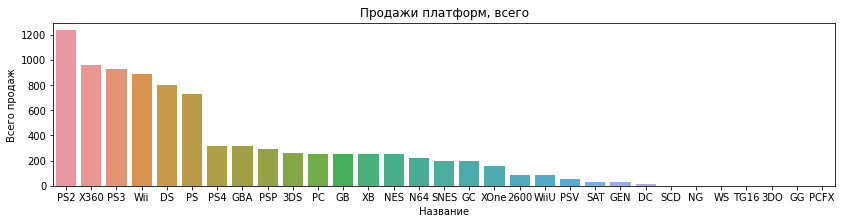

In [23]:
platform_total_sales = df.pivot_table(
    index='platform', values='total_sales', 
    aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(14,3))
sns.barplot(x=platform_total_sales.index,y=platform_total_sales['total_sales'])
plt.title('Продажи платформ, всего')
plt.xlabel('Название')
plt.ylabel('Всего продаж')
plt.show()

In [24]:
top_six_platforms = platform_total_sales.query('total_sales > 315')
print('ТОП 6 платформ:') 
print(top_six_platforms)

ТОП 6 платформ:
          total_sales
platform             
PS2           1233.56
X360           961.24
PS3            931.33
Wii            891.18
DS             802.78
PS             727.58


Построим распределение по годам. Для этого сначала напишем функцию, которая будет собирать распределение продаж по годам для одной платформы:

In [25]:
def platform_total_sales_year (platform, df):
    one_platform_info = df.loc[(df['platform'] == platform) & (df['year_of_release'] > 2000)]
    agg_one_platform_info =one_platform_info.pivot_table(index=['year_of_release'], values='total_sales', 
    aggfunc='sum').sort_values(by='year_of_release',ascending=False)
    return agg_one_platform_info


Построим через цикл графики продаж по годам для каждой платформы из ТОП-6:

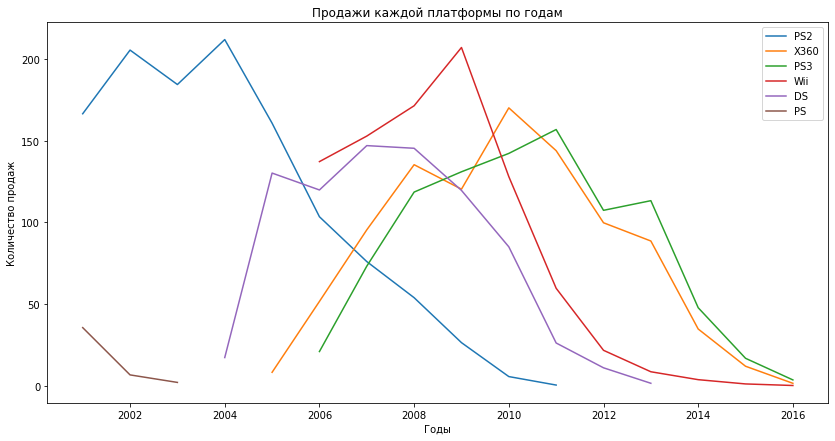

In [26]:
plt.figure(figsize=(14,7))
plt.title('Продажи каждой платформы по годам')
plt.xlabel('Годы')
plt.ylabel('Количество продаж')

for platform in top_six_platforms.index:
    sns.lineplot(data=platform_total_sales_year(platform,df)['total_sales'], label=platform)
    plt.legend()


In [27]:
platform_duratoin = df.groupby('platform')['year_of_release'].describe()
platform_duratoin['duratoin'] = platform_duratoin['max'] - platform_duratoin['min']
display(platform_duratoin.sort_values(by='duratoin', ascending=False))

print('Средняя расчетная продолжительность жизни платформ:', (round(platform_duratoin['duratoin'].mean(),2)))


,count,mean,std,min,25%,50%,75%,max,duratoin
platform,,,,,,,,,
PC,957.0,2008.914316,4.643006,1985.0,2007.00,2010.0,2012.00,2016.0,31.0
DS,2121.0,2008.185290,1.778565,1985.0,2007.00,2008.0,2009.00,2013.0,28.0
GB,97.0,1995.958763,4.178111,1988.0,1992.00,1997.0,2000.00,2001.0,13.0
X360,1232.0,2009.880682,2.458339,2005.0,2008.00,2010.0,2011.00,2016.0,11.0
PSP,1193.0,2008.731769,2.434057,2004.0,2006.00,2009.0,2011.00,2015.0,11.0
PS2,2127.0,2004.583921,2.567689,2000.0,2002.00,2005.0,2007.00,2011.0,11.0
NES,98.0,1987.153061,2.793040,1983.0,1985.00,1986.5,1989.00,1994.0,11.0
DC,52.0,1999.942308,1.808623,1998.0,1999.00,2000.0,2000.00,2008.0,10.0
Wii,1286.0,2008.966563,1.542034,2006.0,2008.00,2009.0,2010.00,2016.0,10.0


Средняя расчетная продолжительность жизни платформ: 7.61


Вывод: в основном срок, за который появляются и исчезают топовые платформы - составляет около 10 лет. При этом средняя продолжительность жизни всех платформ примерно 8 лет.

#### Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Определим период как 2017 минус 3 года - в этом случае мы охватим успешные платформы, которые на 2017 год будут находиться в периоде финального роста или выйдут на плато.

#### Не будем учитывать в работе данные за предыдущие годы.
Сохраним данные с 2014 в новый фрейм.

In [28]:
df_topical = df.loc[df['year_of_release'] > 2014]
df_topical.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknow,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknow,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknow,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,unknow,7.14
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49


#### Ответим на вопрос - какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [29]:
def top_platform_sales_year (platform, df_topical):
    one_platform_info = df_topical.loc[df_topical['platform'] == platform]
    agg_one_platform_info =one_platform_info.pivot_table(index=['year_of_release'], values='total_sales', 
    aggfunc='sum').sort_values(by='year_of_release',ascending=False)
    return agg_one_platform_info


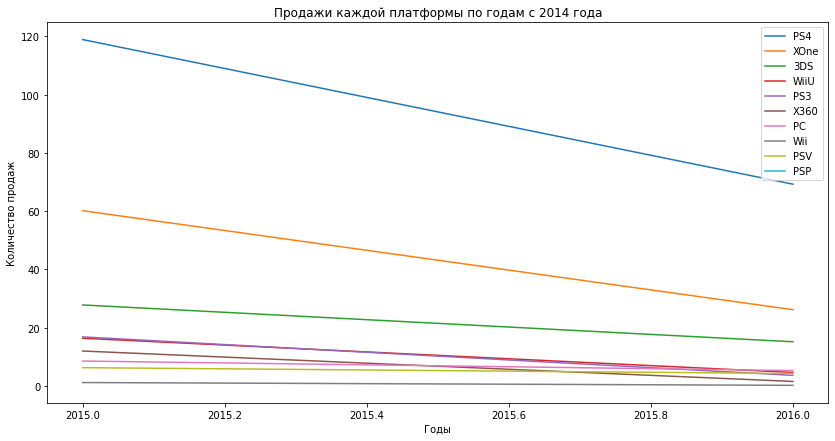

In [30]:
plt.figure(figsize=(14,7))
plt.title('Продажи каждой платформы по годам с 2014 года')
plt.xlabel('Годы')
plt.ylabel('Количество продаж')

for platform in list(df_topical['platform'].unique()):
    sns.lineplot(data=top_platform_sales_year(platform,df_topical)['total_sales'], label=platform)
    plt.legend()


Судя по графику популярность всех платформ падает. И в то же время выделяются ТОП-3 платформ выше остальных по продажам - PS4, XOne,3DS.

Вывод: потенциально прибыльные платформы 3 - PS4, XOne,3DS.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

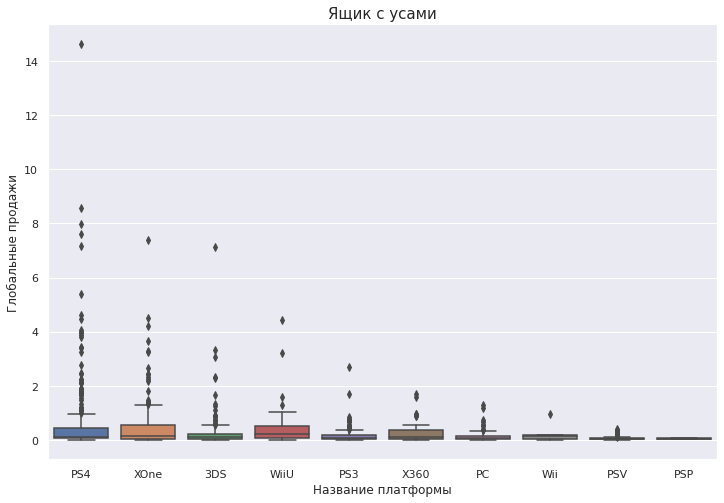

In [31]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
sns.boxplot(data=df_topical, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Название платформы', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

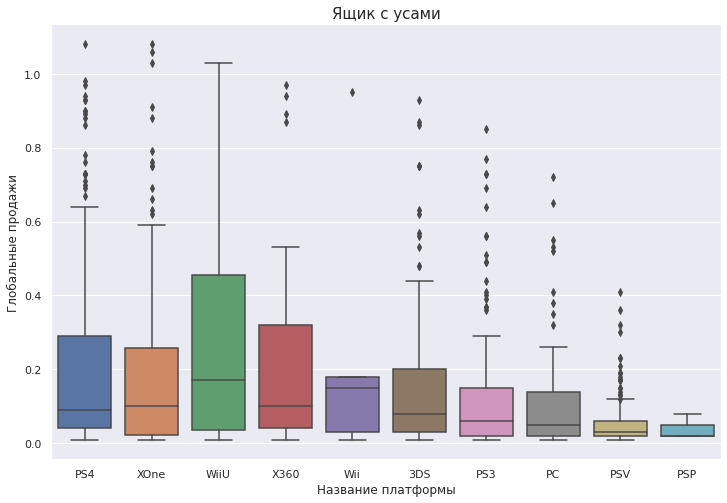

In [32]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
sns.boxplot(data=df_topical.query('total_sales < 1.1'), x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Название платформы', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

На диаграмме можем отметить:
* Самые продаваемы платформы за последние 10 лет- X360,PS3,PS4,XOne,WiiU.
* Медиана у всех платформ разная.
* Самые высокие выбросы у Wii,X360,PS3.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Создадим фрейм с отзывами пользователей и критиков по PS4.

In [33]:
df_ps_four = df_topical.loc[df_topical['platform'] == 'PS4', ['total_sales', 'critic_score', 'user_score']]

Построим диаграмму рассеяния с отзывами пользователей и продажами.

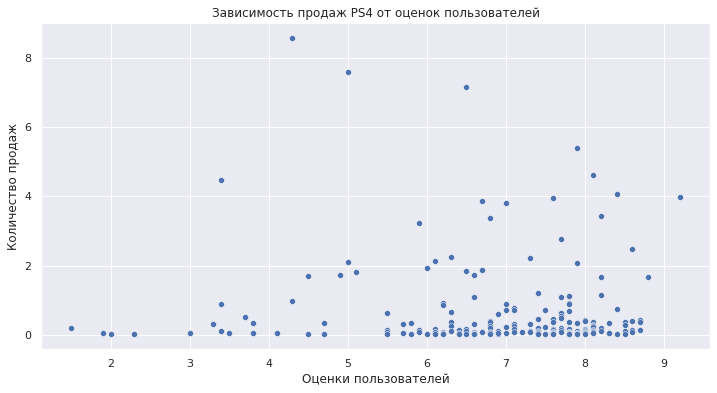

In [34]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
plt.title('Зависимость продаж PS4 от оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
sns.scatterplot(data = df_ps_four, x = df_ps_four['user_score'], y = df_ps_four['total_sales']) 
plt.show() 

Построим диаграмму рассеяния с отзывами критиков и продажами.

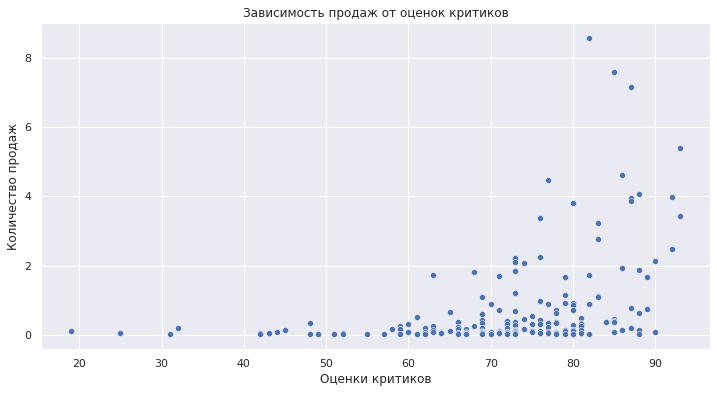

In [35]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
plt.title('Зависимость продаж от оценок критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Количество продаж')
sns.scatterplot(data = df_ps_four, x = df_ps_four['critic_score'], y = df_ps_four['total_sales']) 
plt.show() 

Посчитаем корреляцию между отзывами и продажами.

In [36]:
corr_matrix = df_ps_four.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,total_sales,critic_score,user_score
total_sales,1.000000,0.392849,-0.059738
critic_score,0.392849,1.000000,0.533330
user_score,-0.059738,0.533330,1.000000


На диаграммах рассеяния отчетливо видно, что оценки критиков влияют на продажи гораздо больше чем оценки пользователей. 

Обратимся к матрице корреляции, чтобы понять на сколько:
* корреляция между оценками пользователей и продажами почти отсутствует - -0,03.
* корреляция между оценками критиков и продажами умеренная - 0,41.

Вывод: покупатели чаще прислушиваются к оценкам критиков, и это влияет на продажи.

#### Соотнесем выводы с продажами игр на других платформах.

Для этого напишем фунцию и посторим матрицы корреляции для еще трех топовых платформ 'XOne', 'X360', 'PS3','WiiU' из df_topical.

In [37]:
def platform_corr (platform,df_topical):
    df_platform_scatter = df_topical.loc[df_topical['platform'] == platform, ['total_sales','critic_score', 'user_score']]
    corr_matrix = df_platform_scatter.corr()
    return corr_matrix
    

In [38]:
for platform in ['XOne', 'X360', 'PS3','WiiU']:
    print(platform_corr(platform,df_topical))

              total_sales  critic_score  user_score
total_sales      1.000000      0.430889   -0.041467
critic_score     0.430889      1.000000    0.459443
user_score      -0.041467      0.459443    1.000000
              total_sales  critic_score  user_score
total_sales      1.000000           NaN   -0.281308
critic_score          NaN           NaN         NaN
user_score      -0.281308           NaN    1.000000
              total_sales  critic_score  user_score
total_sales      1.000000           NaN   -0.165295
critic_score          NaN           NaN         NaN
user_score      -0.165295           NaN    1.000000
              total_sales  critic_score  user_score
total_sales      1.000000      0.317046    0.363519
critic_score     0.317046      1.000000    0.678858
user_score       0.363519      0.678858    1.000000


In [39]:
def platform_scatter (platform,df_topical):
    df_platform_scatter = df_topical.loc[df_topical['platform'] == platform, ['critic_score','total_sales']]
    df_platform_scatter = pd.DataFrame(df_platform_scatter)
    return df_platform_scatter
#, 'user_score']                   

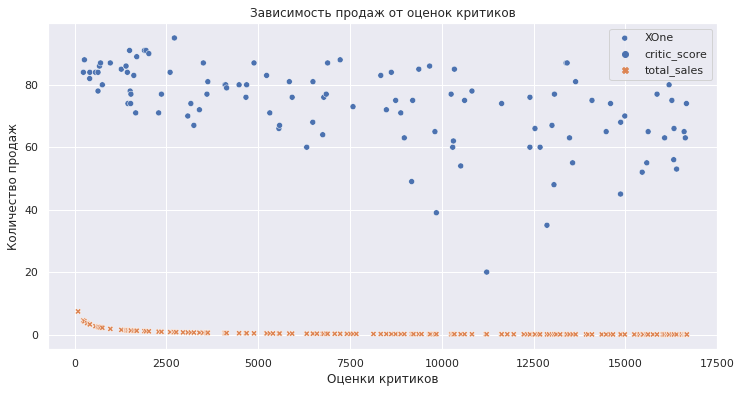

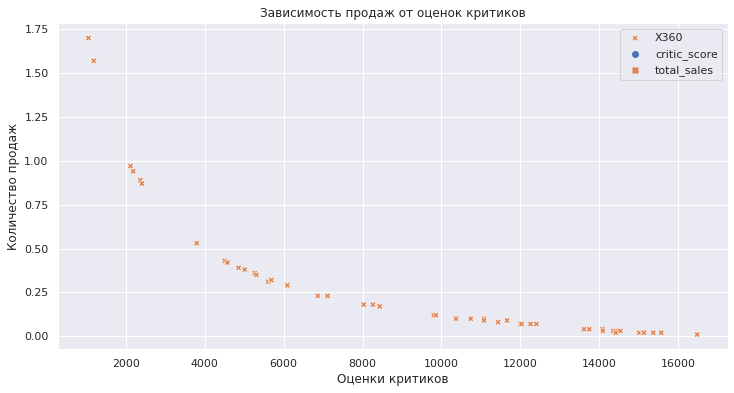

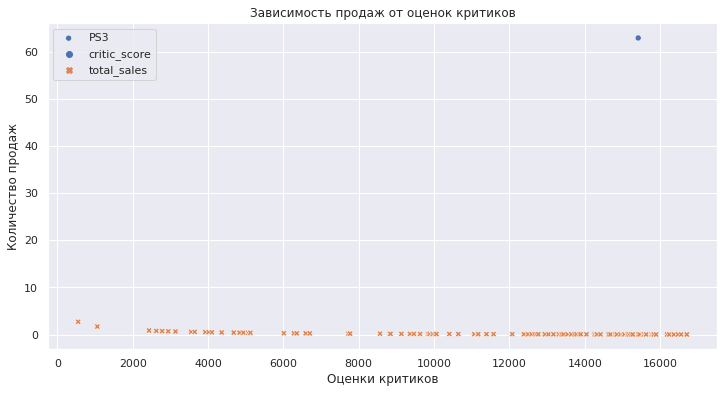

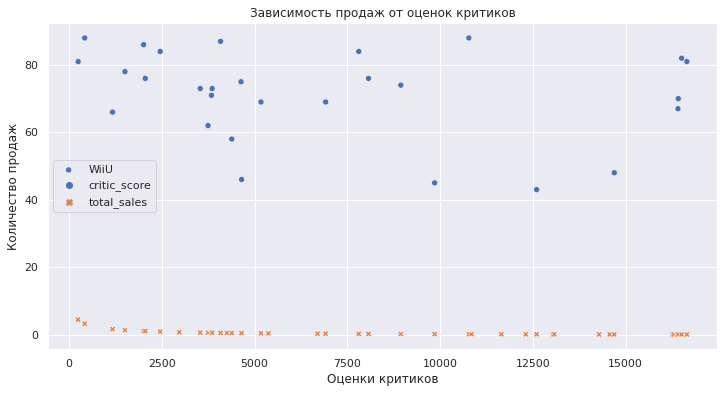

In [40]:
for platform in ['XOne', 'X360', 'PS3','WiiU']:
    sns.set(style="darkgrid")
    plt.figure(figsize=(12,6))
    plt.title('Зависимость продаж от оценок критиков')
    plt.xlabel('Оценки критиков')
    plt.ylabel('Количество продаж')
    sns.scatterplot(data = platform_scatter(platform,df_topical),label=platform)
    plt.show() 

In [41]:
def platform_scatter (platform,df_topical):
    df_platform_scatter = df_topical.loc[df_topical['platform'] == platform, ['total_sales','user_score']]
    return df_platform_scatter                                      

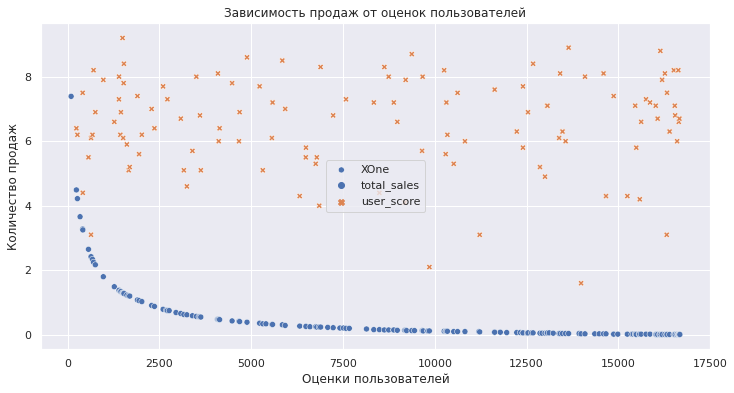

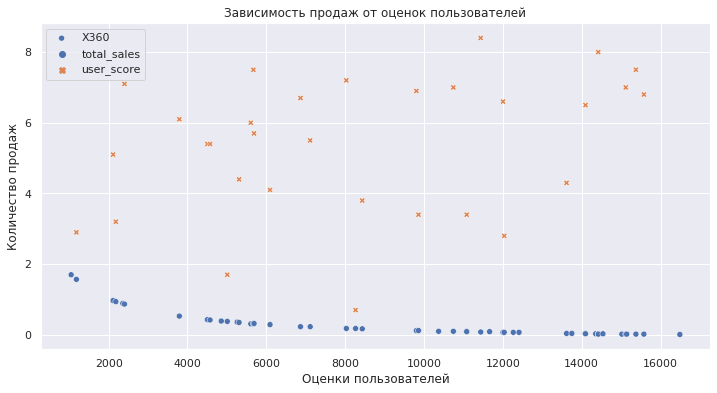

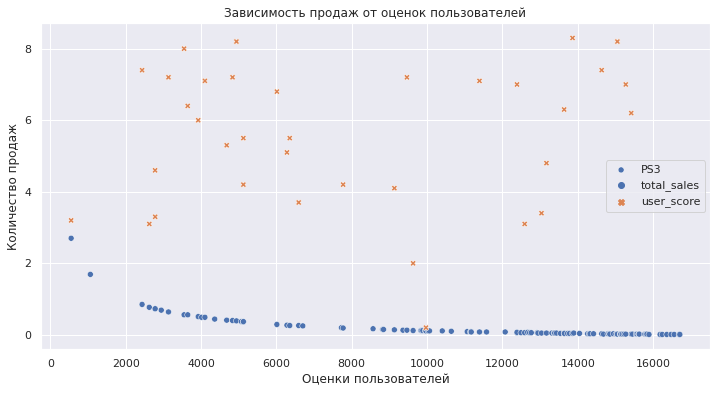

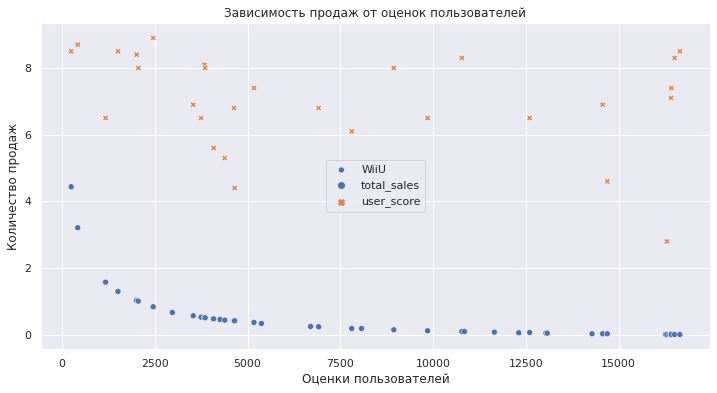

In [42]:
for platform in ['XOne', 'X360', 'PS3','WiiU']:
    sns.set(style="darkgrid")
    plt.figure(figsize=(12,6))
    plt.title('Зависимость продаж от оценок пользователей')
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Количество продаж')
    sns.scatterplot(data = platform_scatter(platform,df_topical),label=platform)
    plt.show() 

В целом ситуация схожа с п 4.3.7 только у XOne и WiiU:
* корреляция между оценками пользователей и продажами почти отсутствует.
* корреляция между оценками критиков и продажами умеренная - 0,43 и 0,31 соответственно.

При этом у платформ X360 и PS3 нет значимой корреляции между продажами и оценками критиков и пользователей.

Вывод: есть умеренная корреляция между оценками критиков и продажами  у последних моделей платформ, у более старых моделей нет значимой корреляции между продажами и оценками критиков и пользователей.

#### Посмотрим на общее распределение игр по жанрам. Ответим на вопросы - что можно сказать о самых прибыльных жанрах?; выделяются ли жанры с высокими и низкими продажами?

In [43]:
df_genre_scatter = df_topical[['total_sales', 'genre']]

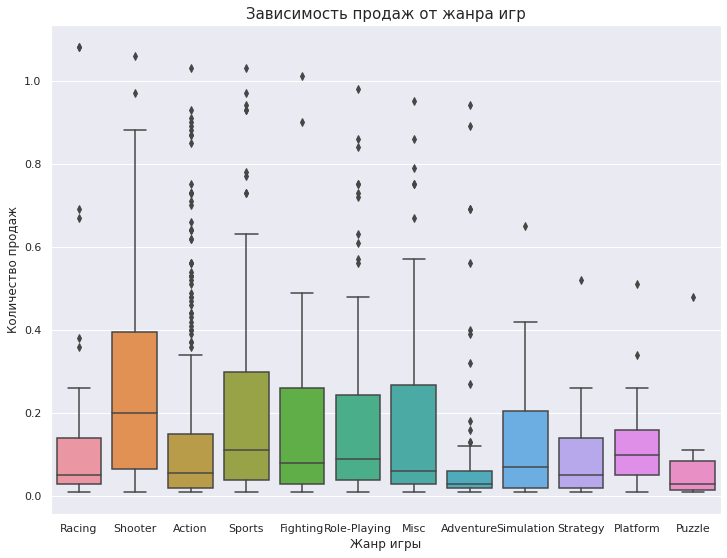

In [44]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,9))
sns.boxplot(data=df_genre_scatter.query('total_sales < 1.1'), x='genre', y='total_sales')
plt.title('Зависимость продаж от жанра игр', fontsize=15)
plt.xlabel('Жанр игры', fontsize=12)
plt.ylabel('Количество продаж',fontsize=12)
plt.show()

Посмотрим на числовое описание данных и отсортируем по убыванию медианы, чтобы исключить влияние выбросов.

In [45]:
df_genre_scatter.groupby('genre')['total_sales'].describe().sort_values(by='50%',ascending=False)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Shooter,81.0,1.305309,2.227297,0.01,0.1300,0.380,1.690,14.63
Sports,107.0,0.601215,1.292693,0.01,0.0450,0.120,0.495,8.58
Role-Playing,132.0,0.422879,1.028082,0.01,0.0400,0.115,0.340,7.17
Platform,28.0,0.331429,0.667387,0.01,0.0575,0.100,0.220,3.21
Simulation,33.0,0.228788,0.531018,0.01,0.0200,0.100,0.220,3.05
Fighting,37.0,0.334324,0.549695,0.01,0.0400,0.090,0.330,2.78
Action,431.0,0.236961,0.525858,0.01,0.0200,0.060,0.190,4.62
Misc,71.0,0.199577,0.286718,0.01,0.0300,0.060,0.290,1.58
Racing,42.0,0.258571,0.497342,0.01,0.0300,0.055,0.215,2.42


Вывод:
* на диаграмме явно можно выделить ТОП-3 жанров по продажам - Shooter,Sports, Role-Playing.
* также явно можно выделить 3 жанра с самыми низкими продажами - Strategy, Puzzle, Adventure.


### Шаг 4. Составим портрет пользователя каждого региона.

#### Определим для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5). Опишем различия в долях продаж.
2. Самые популярные жанры (топ-5). Поясним разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

##### Самые популярные платформы (топ-5). Опишем различия в долях продаж.

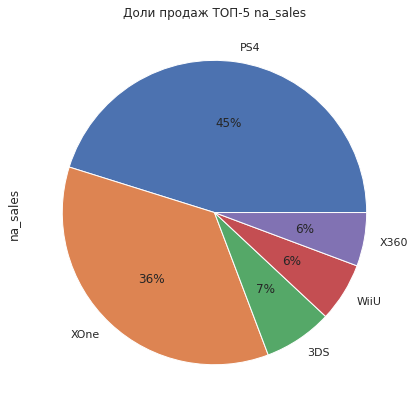

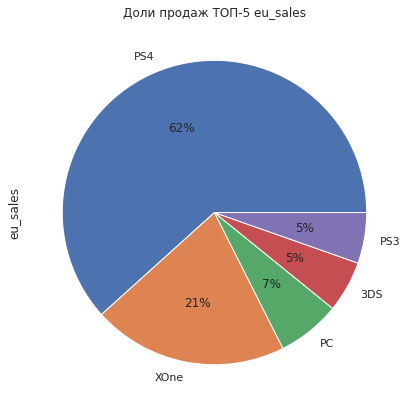

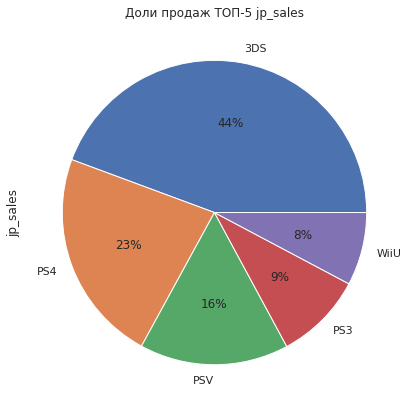

In [46]:
plt.figure(1)
df_topical.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).plot(
    kind = 'pie',
    autopct = '%1.0f%%',
    figsize=(15,7), 
    title = 'Доли продаж ТОП-5 na_sales')
plt.figure(2)
df_topical.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(
    kind = 'pie',
    autopct = '%1.0f%%',
    figsize=(15,7), 
    title = 'Доли продаж ТОП-5 eu_sales')
plt.figure(3)
df_topical.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(
    kind = 'pie',
    autopct = '%1.0f%%',
    figsize=(15,7), 
    title = 'Доли продаж ТОП-5 jp_sales')
plt.show()

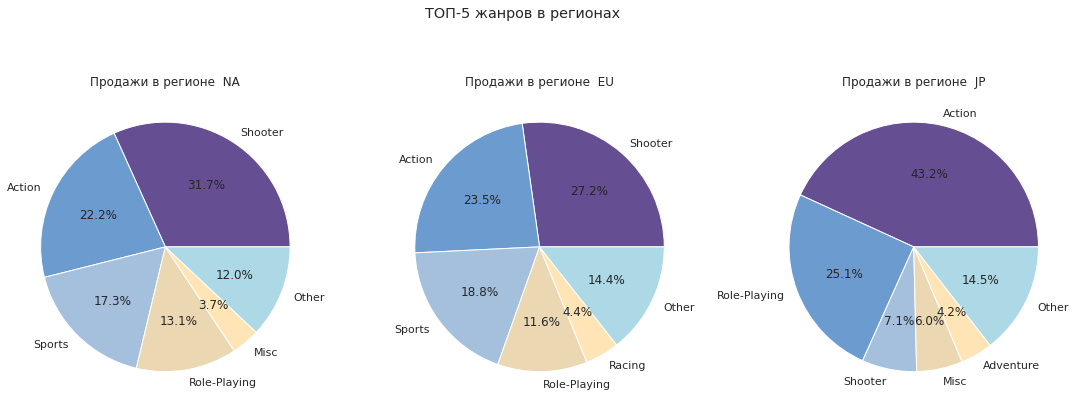

In [64]:
# Создание списка из пастельных цветов
pastel_colors = ['#654E92', '#6C9BCF', '#A5C0DD', '#EBD8B2', '#FFE4B5', '#ADD8E6', '#D8BFD8', '#F0E68C', '#AFEEEE', '#FFC0CB']
# Создание сводной таблицы
pivot = df_topical.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

fig, axs = plt.subplots(1, 3, figsize=(19, 7)) # создаем фигуру с тремя осями в один ряд
fig.suptitle('ТОП-5 жанров в регионах') # подписываем ее

# Оставление только топ-5 значений и объединение остальных значений
regions = ['na_sales', 'eu_sales', 'jp_sales']
for i, region in enumerate(regions):

    top5 = pivot.nlargest(5, region)[region]
    other = pivot[region].sum() - top5.sum()
    top5['Other'] = other
    top5.plot(kind='pie', autopct='%1.1f%%', ax=axs[i], colors=pastel_colors)
    axs[i].set_ylabel(None)  # убираем подпись оси у
    axs[i].set_title(f"Продажи в регионе  {region.split('_')[0].upper()}") # подписываем саму диаграмму
    
plt.show()

Вывод:
* во всех 3-х регионах PS3 входит в топ-3.
* в Европе и Северной Америке - X360 входит в топ-2.
* в Японии первые 2 по объему продаж - DS и 3DS.
* Wii присутствует во всех 3-х регионах.

##### Самые популярные жанры (топ-5). Поясним разницу.

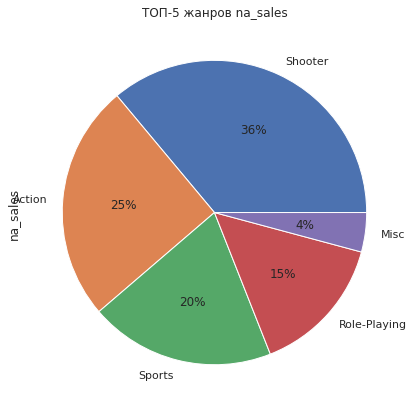

In [47]:
df_topical.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).plot(
    kind = 'pie',
    autopct = '%1.0f%%',
    figsize=(15,7), 
    title = 'ТОП-5 жанров na_sales');

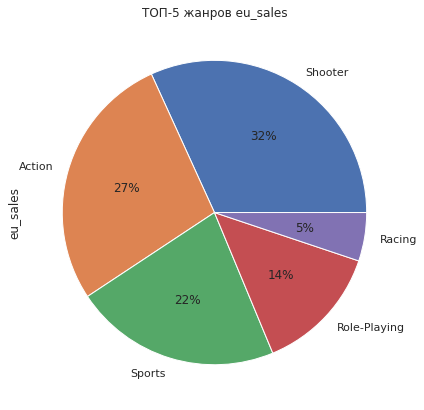

In [48]:
df_topical.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(
    kind = 'pie',
    autopct = '%1.0f%%',
    figsize=(15,7), 
    title = 'ТОП-5 жанров eu_sales');

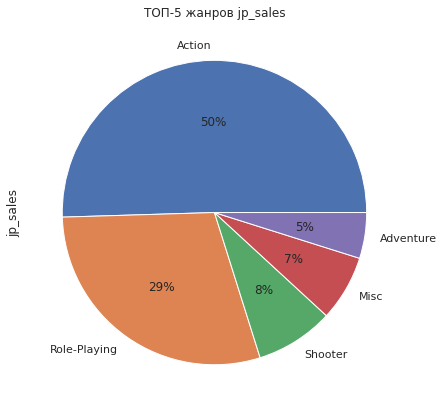

In [49]:
df_topical.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(
    kind = 'pie',
    autopct = '%1.0f%%',
    figsize=(15,7), 
    title = 'ТОП-5 жанров jp_sales');

Вывод:
* Action входит в ТОП-2 жанров во всех регионах.
* Shooter и Sports самые популярные после Action в Европе и Северной Америке.
* Самый популярный жанр в Японии, и присутствующий в ТОП-5 других регионов - Role-Playing.

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [50]:
df_esrb_na_scatter = df_topical[['na_sales', 'rating']]

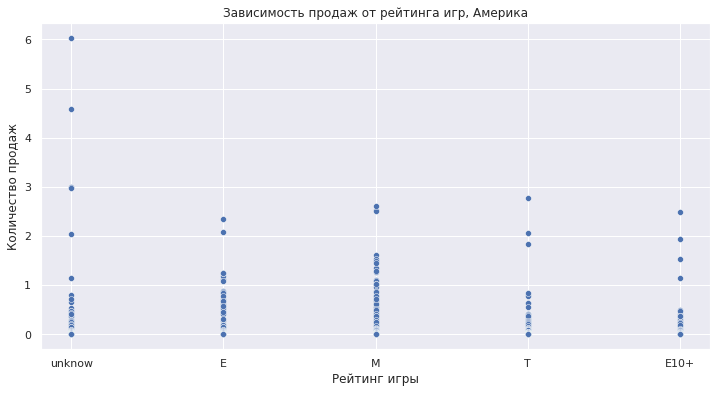

In [51]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
plt.title('Зависимость продаж от рейтинга игр, Америка')
plt.xlabel('Рейтинг игры')
plt.ylabel('Количество продаж')
sns.scatterplot(data = df_esrb_na_scatter, x = df_esrb_na_scatter['rating'], y = df_esrb_na_scatter['na_sales']) 
plt.show() 

In [52]:
df_esrb_eu_scatter = df_topical[['eu_sales', 'rating']]

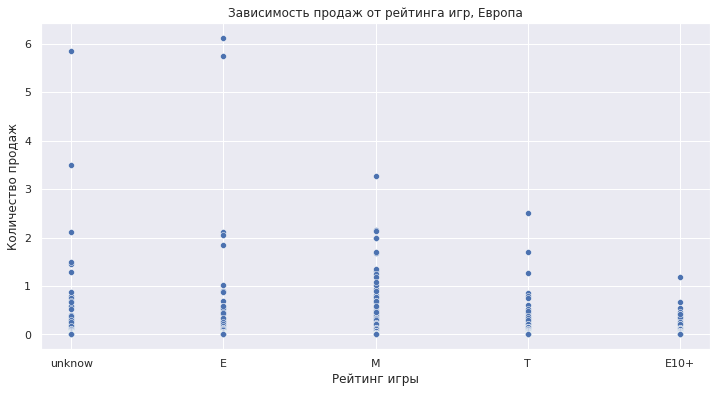

In [53]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
plt.title('Зависимость продаж от рейтинга игр, Европа')
plt.xlabel('Рейтинг игры')
plt.ylabel('Количество продаж')
sns.scatterplot(data = df_esrb_eu_scatter, x = df_esrb_eu_scatter['rating'], y = df_esrb_eu_scatter['eu_sales']) 
plt.show() 

In [54]:
df_esrb_jp_scatter = df_topical[['jp_sales', 'rating']]

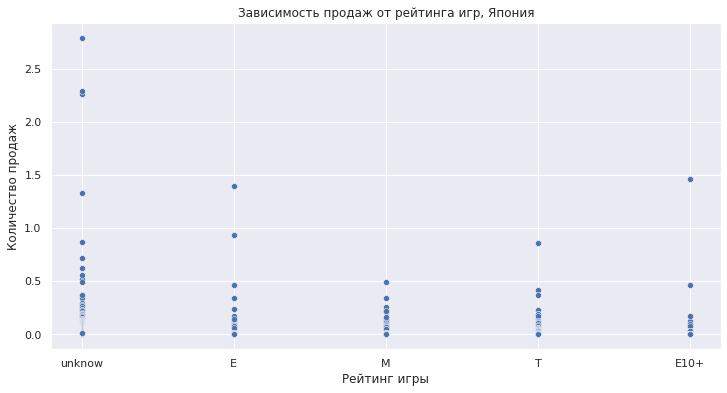

In [55]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
plt.title('Зависимость продаж от рейтинга игр, Япония')
plt.xlabel('Рейтинг игры')
plt.ylabel('Количество продаж')
sns.scatterplot(data = df_esrb_jp_scatter, x = df_esrb_jp_scatter['rating'], y = df_esrb_jp_scatter['jp_sales']) 
plt.show() 

Вывод:
* во всех регионах минимальные продажи с рейтингом EC и RP.
* ТОП 3 во всех странах - продажи с рейтингом E,M и без рейтинга вообще.
* в Японии самый высокий уровень продаж с неуказанным рейтингом.

Рейтинг не влияет на уровень продаж в регионе.


##### Определим портрет для пользователя каждого региона (NA, EU, JP):
 1. NA(Северная Америка) - пользователь предпочитает платформы:
   * X360
   * PS3     
   * Wii     
   * DS      
   * PS4
   
   С игровыми жанрами:
   * Action          
   * Shooter         
   * Sports          
   * Misc            
   * Role-Playing
   
   С рейтингом E,M,T,E10+.
  
 2. EU(Европа) - пользователь предпочитает платформы:
   * PS3
   * X360     
   * Wii     
   * PS4      
   * PC
   
   С игровыми жанрами:
   * Action          
   * Shooter         
   * Sports          
   * Misc            
   * Role-Playing
   
   С рейтингом E,M,T,E10+.
   
  3. JP(Япония) - пользователь предпочитает платформы:
   * 3DS
   * DS     
   * PS3     
   * PSP      
   * Wii
   
   С игровыми жанрами:
   * Role-Playing          
   * Action                    
   * Misc          
   * Sports                       
   * Adventure        
   
   С рейтингом E,M,T,E10+. 

### Проверим гипотезы.

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* нулевая гипотеза - средние пользовательские рейтинги платформы Xbox One равны рейтингам платформы PC.
* альтернативная гипотеза - рейтинги платформы Xbox One и платформы PC отличаются.

In [56]:
alpha = 0.05 # критический уровень статистической значимости

xbox_one = df_topical.query('platform =="XOne"')['user_score']
pc = df_topical.query('platform =="PC"')['user_score']

results = st.ttest_ind(
    xbox_one.dropna(), 
    pc.dropna())

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 0.2778542084733835
Не удалось отвергнуть нулевую гипотезу


In [57]:
xbox_one_mean = df_topical.query('platform =="XOne"')['user_score'].mean()
pc_mean = df_topical.query('platform =="PC"')['user_score'].mean()
print('Среднее значение пользовательских оценок xbox_one:', round(xbox_one_mean,2))
print('Среднее значение пользовательских оценок pc:', round(pc_mean,2))

Среднее значение пользовательских оценок xbox_one: 6.54
Среднее значение пользовательских оценок pc: 6.3


Вывод: мы не можем отвергнуть нулевую гипотезу, с большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* нулевая гипотеза - средние пользовательские рейтинги жанра Action равны  средним пользовательским рейтингам жанра Sports.
* альтернативная гипотеза - средние пользовательские рейтинги жанра Action отличаются от средних пользовательских рейтингов жанра Sports рейтинги.

In [58]:
alpha = 0.05 # критический уровень статистической значимости

action = df_topical.query('genre =="Action"')['user_score']
sports = df_topical.query('genre =="Sports"')['user_score']

results = st.ttest_ind(
    action.dropna(), 
    sports.dropna())

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 1.0012846807938657e-13
Отвергаем нулевую гипотезу


In [59]:
action_mean = df_topical.query('genre =="Action"')['user_score'].mean()
sports_mean = df_topical.query('genre =="Sports"')['user_score'].mean()

print('Среднее значение пользовательских оценок action:', round(action_mean,2))
print('Среднее значение пользовательских оценок sports:', round(sports_mean,2))

Среднее значение пользовательских оценок action: 6.81
Среднее значение пользовательских оценок sports: 5.2


Вывод: мы отвергли нулевую гипотезу, с большой долей вероятности средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые отличия.

#### Поясним методы проверки гипотез:
Как сформулировали нулевую и альтернативную гипотезы:
* нулевую гипотезу формировали исходя из равенства одного среднего другому;
* альтернативную гипотезу формировали исходя из того, что средние не будут равны - в противоположность нулевой гипотезе. В данных случаях мы проверяли двухсторонние гипотезы;

Какой критерий применили для проверки гипотез и почему:
* для проверки гипотез мы применяли критерий - st.ttest_ind "О равенстве средних двух генеральных совокупностей", потому что в обоих случаях поверяли на равенство средние значения двух совокупностей.

### Шаг 6. Общий вывод.

 Мы провели исследование данных о продажах игр, оценки пользователей и экспертов, жанры и платформы, для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.
 
 Целью проекта было выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
 
   Перед анализом данных мы провели предобработку:
* заменили названия столбцов (привели к нижнему регистру);
* преобразовали данные:
   1. В столбце year_of_release к целочисленному типу, тк год это целое число всегда.
   2. При попытке преобразовать user_score к float - возвращалась ошибка, что нельзя преобразовать tbd к float. Буквы tbd значат to be determined, это значит что данные были специально не заполнены, заменили tbd на Nan и преобразовали user_score к float, тк рейтинг записан дробным числом.
* проверили явные дубликаты - отсутствуют.
* проверили неявные дубликаты - удалили повторяющуюся строку.
* обработали пропуски:
   1. В столбцах name, year_of_release,genre пропуски удалили так как их меньше 2% и это не повлияет на исследование.
   2. Пропуски в столбцах critic_score и user_score можно попробовать заполнить исходя из названия игры, но оставим как есть, так как заполнение заполнение 40-50% пропусков может сильно исказить результаты исследования.
   3. Пропуски в столбце rating заменили на 'unknow' для последующего исследования.
* вероятных причин пропусков может быть несколько:
   1. ошибка выгрузки данных для современных игр.
   2. отсутствие измерения рейтинга как такового для старых игр.
   3. отсутствие рейтинга на непопулярных платформах и/или играх. 
* посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

   Провели исследовательский анализ данных:
* посмотрели, сколько игр выпускалось в разные годы - количество выпускаемых игр начало активно расти с 1997 года, а количество оценок пользователей, критиков и рейтинга с 2000 года. Вывод - данные по играм до 2000 года не важны для дальнейшего исследования в связи с маленьким количеством оценок. 
* посмотрели, как менялись продажи по платформам - в основном срок, за который появляются и исчезают топовые платформы - составляет около 10 лет. При этом средняя продолжительность жизни всех платформ примерно 8 лет.
* определили период как 2017 минус 3 года - в этом случае мы охватим успешные платформы, которые на 2017 год будут находиться в периоде финального роста или выйдут на плато.
* выяснили, что популярность всех платформ падает. И в то же время выделяются ТОП-3 платформ выше остальных по продажам - PS4, XOne,3DS.
* построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам.На диаграмме можем отметить:
   1. Самые продаваемы платформы за последние 10 лет- X360,PS3,PS4,XOne,WiiU.
   2. Медиана у всех платформ разная.
   3. Самые высокие выбросы у Wii,X360,PS3.
* посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков и выяснили что покупатели чаще прислушиваются к оценкам критиков, и это влияет на продажи. Отзывы пользователей не влияют на продажи.
* соотнесли выводы с продажами игр на других платформах и выяснили, что есть умеренная корреляция между оценками критиков и продажами у последних моделей платформ, у более старых моделей нет значимой корреляции между продажами и оценками критиков и пользователей.
* посмотрели на общее распределение игр по жанрам:
   1. на диаграмме явно можно выделить ТОП-3 жанров по продажам - Shooter,Sports, Role-Playing.
   2. также явно можно выделить 3 жанра с самыми низкими продажами - Strategy, Puzzle, Adventure.

 Составили портрет пользователя каждого региона.
 
NA(Северная Америка) - пользователь предпочитает платформы:
* X360
* PS3
* Wii
* DS
* PS4

С игровыми жанрами:
* Action
* Shooter
* Sports
* Misc
* Role-Playing

С рейтингом E,M,T,E10+.

EU(Европа) - пользователь предпочитает платформы:
* PS3
* X360
* Wii
* PS4
* PC

С игровыми жанрами:
* Action
* Shooter
* Sports
* Misc
* Role-Playing

С рейтингом E,M,T,E10+.

JP(Япония) - пользователь предпочитает платформы:
* 3DS
* DS
* PS3
* PSP
* Wii

С игровыми жанрами:
* Role-Playing
* Action
* Misc
* Sports
* Adventure

С рейтингом E,M,T,E10+.

   Проверили гипотезы:
* средние пользовательские рейтинги платформ Xbox One и PC одинаковые - мы не можем отвергнуть нулевую гипотезу, с большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.
* средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - мы отвергли нулевую гипотезу, с большой долей вероятности средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые отличия.

Как сформулировали нулевую и альтернативную гипотезы:
* нулевую гипотезу формировали исходя из равенства одного среднего другому;
* альтернативную гипотезу формировали исходя из того, что средние не будут равны - в противоположность нулевой гипотезе. В данных случаях мы проверяли двухсторонние гипотезы;

Какой критерий применили для проверки гипотез и почему:
* для проверки гипотез мы применяли критерий - st.ttest_ind "О равенстве средних двух генеральных совокупностей", потому что в обоих случаях поверяли на равенство средние значения двух совокупностей.

 Общие рекомендации отделу маркетинга:
1. Самые популярные платформы X360,PS3,PS4,XOne,WiiU. Для пользователей Японии ставку также следует делать на платформы 3DS и DS.
2. Важно понимать, что популярность всех платформ падает. И в то же время выделяются ТОП-3 платформ выше остальных по продажам на адающем рынке - PS4, XOne,3DS.
3. Самые популярные жанры на этих платформах зависят от региона, при планировании маркетинговой компании нужно ориентироваться на портрет пользователя в каждом регионе.
4. Рейтинг ESRB не влияет на продажи, его не следует учитывать в маркетинговой компании. 